In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
%load_ext autoreload
%autoreload

# Load dataset 

In [2]:
from datasets import load_dataset

ds = load_dataset("maharshipandya/spotify-tracks-dataset")

/Users/sbeasse/.pyenv/versions/3.10.6/envs/vinylitics/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = ds['train'].to_pandas()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [4]:
df.track_genre.value_counts(normalize=True)

track_genre
acoustic             0.008772
punk-rock            0.008772
progressive-house    0.008772
power-pop            0.008772
pop                  0.008772
                       ...   
folk                 0.008772
emo                  0.008772
electronic           0.008772
electro              0.008772
world-music          0.008772
Name: proportion, Length: 114, dtype: float64

In [5]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [6]:
df.dropna(inplace=True)

In [7]:
df1 = df[((df.tempo != 0) & (df.time_signature != 0))]

In [8]:
df1.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113836.000000,1.138360e+05,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000
mean,33.233476,2.281096e+05,0.567590,0.642112,5.309199,-8.239513,0.637496,0.084770,0.314642,0.155362,0.213228,0.474725,122.316220,3.909624
std,22.316549,1.063084e+05,0.172379,0.250786,3.559429,4.992758,0.480725,0.105762,0.332332,0.308884,0.189932,0.258841,29.653809,0.406909
min,0.000000,1.580000e+04,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000,1.000000
25%,17.000000,1.741980e+05,0.456000,0.473000,2.000000,-10.002000,0.000000,0.035900,0.016900,0.000000,0.098000,0.261000,99.430500,4.000000
50%,34.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.998000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.023000,4.000000
75%,50.000000,2.615870e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084600,0.597000,0.047700,0.273000,0.683000,140.078000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [9]:
df1['mode'].value_counts(normalize=True)

mode
1    0.637496
0    0.362504
Name: proportion, dtype: float64

<Axes: xlabel='tempo', ylabel='Count'>

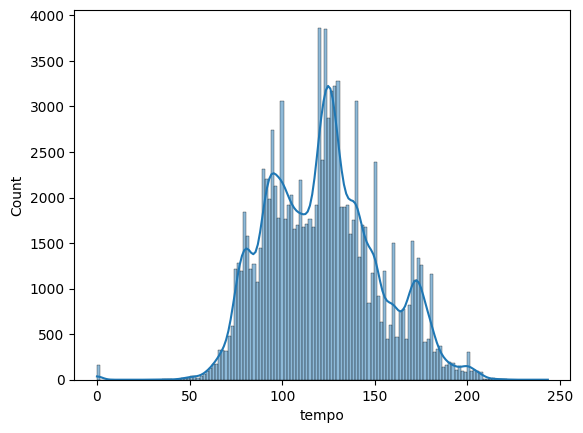

In [10]:
sns.histplot(df.tempo, kde=True)

<Axes: xlabel='tempo', ylabel='Count'>

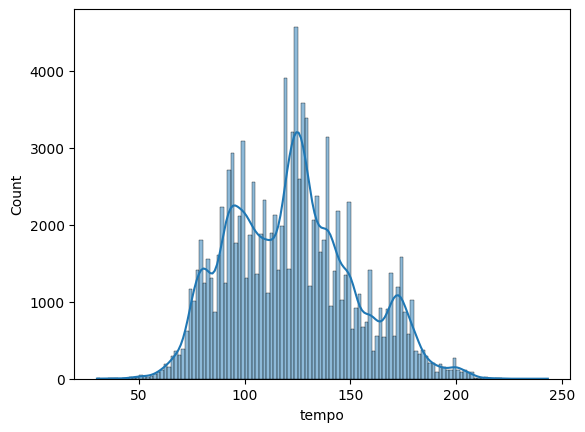

In [11]:
sns.histplot(df1.tempo, kde=True)

<Axes: xlabel='popularity', ylabel='Count'>

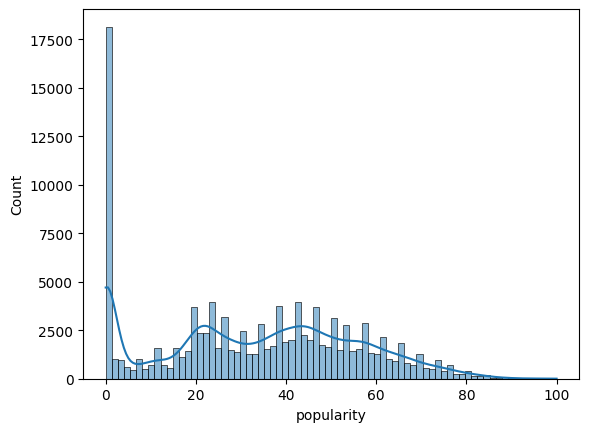

In [12]:
sns.histplot(df1.popularity, kde=True)

In [13]:
df1[df1.popularity==0].sample(15)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
59998,6jJFDxGuPvwOXVa6mmhWYK,Kiawasch Sahebnassagh;Amirhosein Allah Yari,Forty Poems To Kharaghan,Rubai 21 To 25,0,312120,False,0.312,0.154,0,-19.905,0,0.0495,0.550000,0.061000,0.1830,0.0815,96.009,5,iranian
81339,3Q3dm9m4kCaQqGB4pXXn9l,Justin Bieber,Best Christmas Music 2022,Mistletoe,0,183066,False,0.623,0.668,6,-7.282,0,0.0531,0.475000,0.000000,0.0862,0.8230,161.948,4,pop
86041,2kDuAIr3uJKloU1cnNO6KT,Paramore;Smash Mode,10's Dance Classics,Ain't It Fun - Smash Mode Remix,0,325312,False,0.680,0.884,1,-5.146,0,0.0501,0.000408,0.003040,0.0738,0.8270,124.040,4,punk
56872,51zLJklDhB01krdntnfaCS,Mahalia,New RnB,I Wish I Missed My Ex,0,203066,False,0.669,0.669,0,-4.185,1,0.0849,0.274000,0.000000,0.2890,0.5460,95.023,4,indie-pop
93882,5nrBXMtKMtCVgt5w0Vb6wl,"Nikolai Erdenko;Ансамбль ""Джанг""",Лучшая цыганская музыка. Часть третья,Все карты,0,159680,False,0.479,0.329,9,-20.522,0,0.0599,0.257000,0.000000,0.3000,0.8850,100.694,4,romance
64033,4b2jsFgwiua3iomixuDbJk,Norah Jones,A Merry Modern Christmas,The Christmas Waltz,0,197866,False,0.475,0.347,5,-6.538,1,0.2130,0.776000,0.000120,0.1130,0.2850,175.200,3,jazz
88509,4wit0NHnugHv2PqEUtxmiL,Alvaro Diaz;Feid;Tainy,Reggaeton Mix Perreito,Llori Pari,0,215026,False,0.602,0.573,5,-7.388,1,0.0518,0.282000,0.000000,0.0854,0.3190,174.048,4,reggae
89271,1Px7xuvKUtX8ctQl2tcjZz,Jhayco;Anuel AA,Clásicos de ahora: Perreo,Ley Seca,0,263666,False,0.759,0.843,8,-3.718,1,0.0913,0.127000,0.000000,0.1140,0.5600,105.016,4,reggaeton
103896,4dfKkLkiQsPr6DNux83BC3,Candi Staton,Gourmet Soul,Young Hearts Run Free,0,249293,False,0.646,0.693,7,-8.080,0,0.0436,0.162000,0.000006,0.2630,0.8250,115.514,4,soul
103289,4SrjgqhVFK3dIbQS4Jll20,The Temptations,Soulful Christmas,Rudolph The Red-Nosed Reindeer - Stereo,0,189000,False,0.455,0.462,0,-11.230,1,0.0293,0.057700,0.000000,0.2850,0.6890,94.271,4,soul


In [14]:
df2 = df1[df1.popularity!=0]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97821 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          97821 non-null  object 
 1   artists           97821 non-null  object 
 2   album_name        97821 non-null  object 
 3   track_name        97821 non-null  object 
 4   popularity        97821 non-null  int64  
 5   duration_ms       97821 non-null  int64  
 6   explicit          97821 non-null  bool   
 7   danceability      97821 non-null  float64
 8   energy            97821 non-null  float64
 9   key               97821 non-null  int64  
 10  loudness          97821 non-null  float64
 11  mode              97821 non-null  int64  
 12  speechiness       97821 non-null  float64
 13  acousticness      97821 non-null  float64
 14  instrumentalness  97821 non-null  float64
 15  liveness          97821 non-null  float64
 16  valence           97821 non-null  float64
 1

In [15]:
df2.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,97821.000000,9.782100e+04,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000
mean,38.674375,2.304803e+05,0.566562,0.646554,5.305660,-8.243929,0.634424,0.086542,0.310430,0.164002,0.217556,0.469450,122.874967,3.912442
std,19.213006,1.095880e+05,0.171381,0.249533,3.552816,4.945889,0.481594,0.110241,0.329577,0.315355,0.195331,0.258156,29.591444,0.403738
min,1.000000,2.426600e+04,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.322000,1.000000
25%,23.000000,1.756130e+05,0.457000,0.477000,2.000000,-10.044000,0.000000,0.035900,0.014600,0.000000,0.098500,0.256000,99.977000,4.000000
50%,39.000000,2.155040e+05,0.578000,0.688000,5.000000,-7.064000,1.000000,0.049100,0.167000,0.000059,0.133000,0.456000,122.866000,4.000000
75%,53.000000,2.654260e+05,0.693000,0.858000,8.000000,-5.024000,1.000000,0.085700,0.588000,0.070300,0.280000,0.676000,141.167000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [16]:
df2.time_signature.value_counts(normalize=True)

time_signature
4    0.898437
3    0.077284
5    0.015641
1    0.008638
Name: proportion, dtype: float64

<Axes: xlabel='valence', ylabel='Count'>

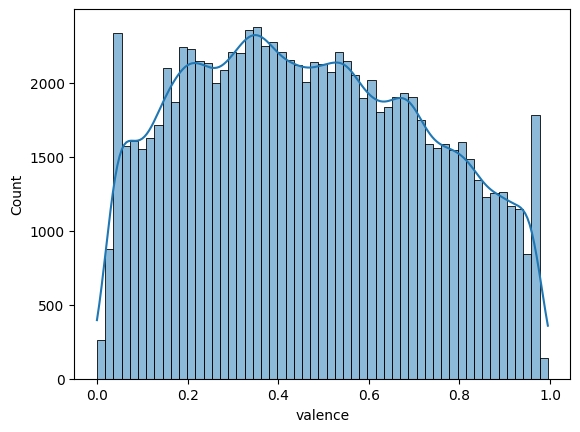

In [17]:
sns.histplot(df2.valence, kde=True)

<Axes: xlabel='loudness', ylabel='danceability'>

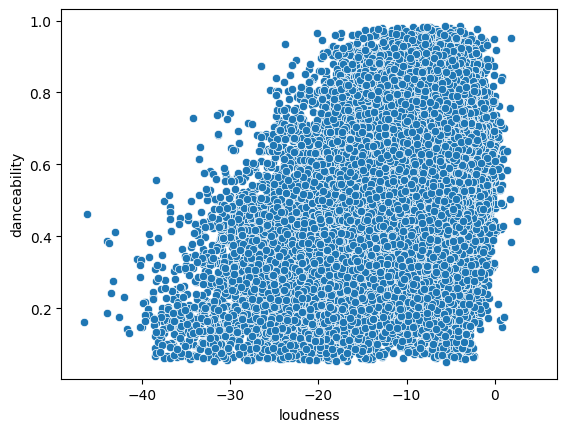

In [18]:
sns.scatterplot(data=df2, x='loudness', y='danceability')

In [19]:
df2.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

# Preproc

In [20]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

In [21]:
keep_columns = ['duration_ms', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']

cat_col = ['key', 'mode', 'time_signature']

num_col = ['duration_ms', 'danceability', 'energy','loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']

In [22]:
for col in cat_col:
    print(df2[col].value_counts(normalize=True))
    print('---------------')

key
7     0.117592
0     0.112215
2     0.104732
9     0.099580
1     0.094796
11    0.081864
4     0.081434
5     0.081026
6     0.069453
10    0.064158
8     0.062584
3     0.030566
Name: proportion, dtype: float64
---------------
mode
1    0.634424
0    0.365576
Name: proportion, dtype: float64
---------------
time_signature
4    0.898437
3    0.077284
5    0.015641
1    0.008638
Name: proportion, dtype: float64
---------------


<Axes: >

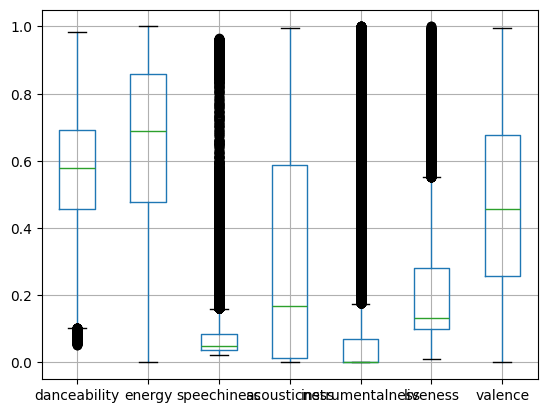

In [23]:
df2[['danceability', 'energy',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence']].boxplot()

## Features preprocessing

In [24]:
import string
def basic_cleaning(sentence):
    # TODO: Apply all cleaning methods used above
    # 1. Lowercasing
    sentence = sentence.lower()
    # 2. Removing whitespaces
    sentence = sentence.strip()

    return sentence

In [25]:
df2_copy = df2.copy()

In [26]:
df2_copy['track_name'] = df2_copy['track_name'].map(lambda x: basic_cleaning(x))
df2_copy['artists'] = df2_copy['artists'].map(lambda x: basic_cleaning(x))


In [27]:
# Groupby artist name and track name, keeping only the most popular version of the song
df2_copy = df2_copy.groupby(['track_name', 'artists'], as_index=False).max()

In [28]:
X = df2_copy[keep_columns]

In [29]:
num_preproc = Pipeline([
    ("scaler", RobustScaler())
])
cat_preproc = Pipeline([
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [30]:
preproc = make_column_transformer(
    (num_preproc, num_col),
    (cat_preproc, cat_col),
    remainder='drop'
)
preproc_pipe = make_pipeline(preproc)

In [31]:
X_preproc = preproc_pipe.fit_transform(X)

In [32]:
X_preproc.shape

(76314, 28)

# Model test

In [33]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

In [34]:
pca = PCA()
pca.fit(X_preproc)

PCA()

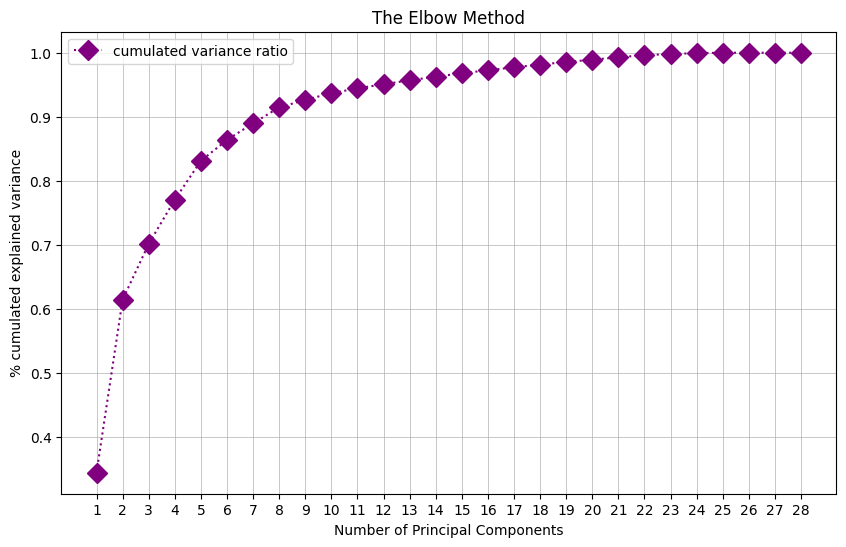

In [35]:
with plt.style.context('fast'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    explained_variance_ratio_cumulated = np.cumsum(pca.explained_variance_ratio_)
    x_axis_ticks = np.arange(1,explained_variance_ratio_cumulated.shape[0]+1)
    ax.plot(x_axis_ticks,explained_variance_ratio_cumulated,label="cumulated variance ratio",color="purple",linestyle=":",marker="D",markersize=10)
    # customizing
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('% cumulated explained variance')
    ax.legend(loc="upper left")
    ax.set_title('The Elbow Method')
    ax.set_xticks(x_axis_ticks)

    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

In [36]:
threhsold_pca = 10
pca = PCA(n_components=threhsold_pca, whiten=True)
pca.fit(X_preproc)
X_proj = pd.DataFrame(pca.transform(X_preproc))
X_proj

,0,1,2,3,4,5,6,7,8,9
0,-1.147457,0.725275,-0.415206,0.212712,-1.180385,0.372319,-1.289365,0.496071,-0.683312,-0.696880
1,-0.131647,-0.755679,-0.985748,-0.332862,-0.452679,0.923092,0.823137,0.982811,1.538025,0.068105
2,-0.506131,-0.442884,-1.018229,0.954980,-0.713855,0.316088,-0.723217,-0.485166,1.060281,-0.579524
3,-0.402432,-0.599335,0.112982,0.900261,1.106089,0.151342,-0.032007,-1.219590,-0.576507,-0.571372
4,-0.495699,0.119877,0.912800,-0.238720,-0.332345,-2.358363,-0.342541,-0.655143,0.145585,-1.331409
...,...,...,...,...,...,...,...,...,...,...
76309,-0.019298,-0.681387,-0.600044,-1.390025,-0.139955,-1.292508,-0.386900,-0.026071,-0.947374,1.472633
76310,-0.409286,-0.541776,-0.029347,0.543359,-0.481665,0.005830,-0.258308,-1.140572,0.316580,0.152377
76311,1.936830,1.323293,-1.369493,-0.461175,0.027711,-0.631348,-1.137390,0.826190,-1.480218,0.651758
76312,1.970917,1.170385,-0.521381,-0.129003,-0.044899,-0.135184,-1.702479,1.245180,0.130531,1.250418


In [37]:
kmeans_pca = KMeans(n_clusters = 8)
kmeans_pca.fit(X_proj)
kmeans_pca

KMeans()

In [38]:
nb_clusters_to_try = np.arange(1,115,1)
nb_clusters_to_try

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114])

In [39]:
# Apply the elbow method to find the optimal number of clusters.

wcss = []

for K in nb_clusters_to_try:
    print('working with ' + str(K) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(X_proj)
    wcss.append(kmeans.inertia_)
print("DONE !")

working with 1 clusters...
working with 2 clusters...
working with 3 clusters...
working with 4 clusters...
working with 5 clusters...
working with 6 clusters...
working with 7 clusters...
working with 8 clusters...
working with 9 clusters...
working with 10 clusters...
working with 11 clusters...
working with 12 clusters...
working with 13 clusters...
working with 14 clusters...
working with 15 clusters...
working with 16 clusters...
working with 17 clusters...
working with 18 clusters...
working with 19 clusters...
working with 20 clusters...
working with 21 clusters...
working with 22 clusters...
working with 23 clusters...
working with 24 clusters...
working with 25 clusters...
working with 26 clusters...
working with 27 clusters...
working with 28 clusters...
working with 29 clusters...
working with 30 clusters...
working with 31 clusters...
working with 32 clusters...
working with 33 clusters...
working with 34 clusters...
working with 35 clusters...
working with 36 clusters...
w

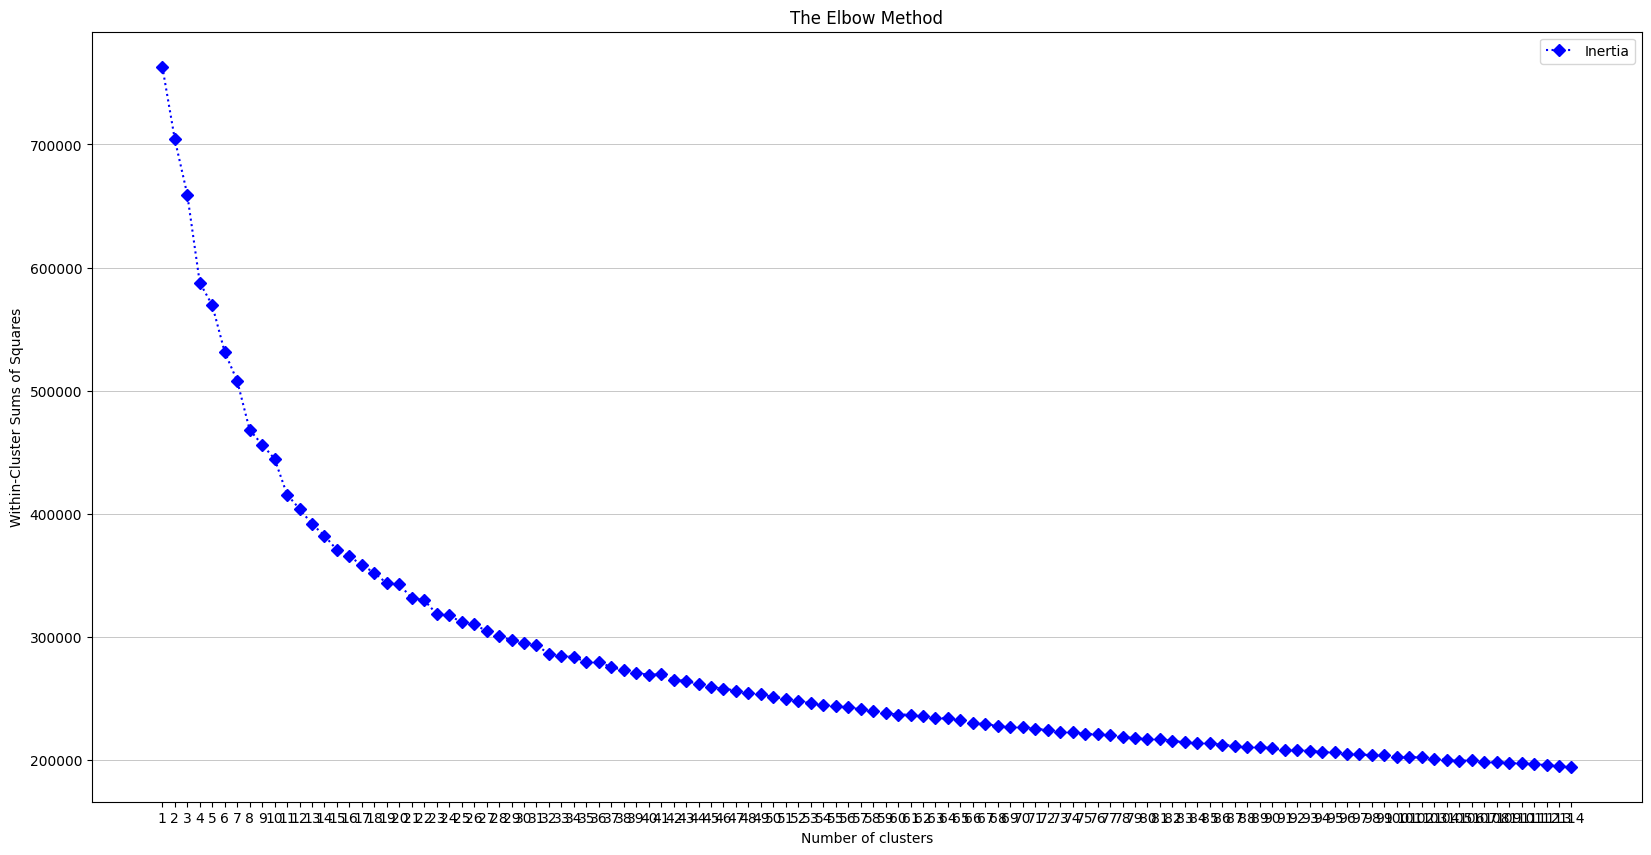

In [40]:
with plt.style.context('fast'):
    # figsize
    plt.figure(figsize=(20,10))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(nb_clusters_to_try, wcss,color="blue",linestyle=":",marker="D",label="Inertia")
    # customizing
    ax.legend(loc="upper right")
    ax.set_title('The Elbow Method')
    ax.set_xticks(nb_clusters_to_try)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Within-Cluster Sums of Squares')
    # annotate


    ax.grid(axis="y",linewidth=0.5)
    plt.show()

In [41]:
kmeans_114 = KMeans(n_clusters = 114)
kmeans_114.fit(X_proj)
labelling_114 = kmeans_114.labels_

In [48]:
X_label = pd.concat([df2_copy,pd.Series(labelling_114)],axis=1).rename(columns={0:"label"})
X_label[(X_label.label == 20)& (X_label.popularity < 10)]

,track_name,artists,track_id,album_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,label
1915,acting shady,apache indian,3ehCekNDTrGlf89L4kGK2u,Time For Change,2,239640,False,0.833,0.906,6,...,1,0.1450,0.22800,0.000002,0.0664,0.962,96.968,4,dancehall,20
7428,big yellow taxi,counting crows;vanessa carlton,4YZg4UXqhMoUM40aPNIX1v,OO's Music Grandi Successi,1,226826,False,0.674,0.867,1,...,1,0.0462,0.00199,0.000000,0.2060,0.821,88.040,4,rock,20
8547,borracho de amor,cali y el dandee;reik,2awk2br4XeJn2L6Dl9stuj,Halloween 2022 Perreo Vol. 5,1,175640,False,0.620,0.754,9,...,1,0.1160,0.05780,0.000000,0.0993,0.828,90.064,4,reggaeton,20
9372,burn out,midland,1tQ7g3atJDUiwXqwCPQks0,Sad Country Songs,1,189613,False,0.672,0.724,7,...,1,0.0244,0.29200,0.000000,0.2310,0.801,99.975,4,country,20
9580,báilame - remix,nacho;yandel;bad bunny;mambo kingz;dj luian,4PbiFd4s18OBMf7tXgtBUc,Reggeaton Imperdible,1,217080,False,0.791,0.866,6,...,1,0.0496,0.24800,0.000005,0.0696,0.710,96.013,4,reggaeton,20
11888,click your troubles away,miss melodee,780vC99DmeLqjdqUmVikWe,Find Your Melody,8,221173,False,0.757,0.683,7,...,1,0.0310,0.08530,0.000000,0.2310,0.777,95.000,4,kids,20
12548,como un bebé,j balvin;bad bunny;mr eazi,3LaQzvfIetBWdtIV0JoBwF,Feliz Cumpleaños con Perreo,5,218826,False,0.825,0.807,6,...,1,0.0950,0.07410,0.000005,0.1380,0.816,103.053,4,reggaeton,20
12807,contigo voy a muerte,karol g;camilo,5RZ2onkccYP8RbSamO0hXT,Esto No Se Le Dedica A Cualquiera,4,219960,False,0.770,0.852,11,...,1,0.0489,0.20100,0.000003,0.0623,0.785,82.997,4,reggaeton,20
13172,country girl (shake it for me),luke bryan,43WFp6WBAvNgc7iaFFEUJp,Tailgate Country,2,225560,False,0.644,0.904,2,...,1,0.0464,0.02950,0.000000,0.0834,0.672,105.969,4,country,20
13960,dale don dale,don omar,76CBhtLnY35sDxm3LBCTvn,Feliz Cumpleaños con Perreo,1,212413,False,0.831,0.818,2,...,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,reggaeton,20


# K neighbors

In [43]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X_preproc)

## Predict -- test set

In [64]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
track_id = '11dFghVXANMlKmJXsNCbNl'

track = sp.track(track_id=track_id)

In [60]:
pd.DataFrame([track])

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[],1,207959,False,{'isrc': 'USUM71703861'},{'spotify': 'https://open.spotify.com/track/11...,https://api.spotify.com/v1/tracks/11dFghVXANMl...,11dFghVXANMlKmJXsNCbNl,False,Cut To The Feeling,0,None,1,track,spotify:track:11dFghVXANMlKmJXsNCbNl


In [67]:
import requests

auth_headers = {
    "client_id": $SPOTIPY_CLIENT_ID,
    "response_type": "code",
    "redirect_uri": "http://localhost:1234",
    "scope": "user-library-read"
}

SyntaxError: invalid syntax (189179915.py, line 4)